In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import polars as pl
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

Czy GPU jestt :  []


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
# mobilerecordings = pl.read_csv('C:\\Users\\user\\Documents\\danonki\\mobilerecordings.csv' ,   ignore_errors=True )
# visits = pl.read_csv('C:\\Users\\user\\Documents\\danonki\\wizyty.csv' ,   ignore_errors=True )

# mr_linear = pl.read_csv('C:\\Users\\user\\Documents\\danonki\\model_df_linear.csv' ,   ignore_errors=True )
# mr_linear = mr_linear.select(['patient_id','recording','create_date','date','visit_date','time_point','confidence','label','chunks_count','euthymia','depression','mania','mixed'])
# mr_linear = mr_linear.rename({"recording": "mr"})
# mr_linear

# mr_gauss = pl.read_csv('C:\\Users\\user\\Documents\\danonki\\model_df.csv' ,   ignore_errors=True )
# mr_gauss = mr_gauss.select(['patient_id','recording','create_date','date','visit_date','time_point','confidence','label','chunks_count','euthymia','depression','mania','mixed'])
# mr_gauss = mr_gauss.rename({"recording": "mr"})
# mr_gauss

In [3]:
mr_constant = pl.read_csv('C:\\Users\\user\\Documents\\danonki\\model_df_constant.csv' ,   ignore_errors=True )
mr_constant = mr_constant.select(['patient_id','recording','create_date','date','visit_date','time_point','confidence','label','chunks_count','euthymia','depression','mania','mixed'])
mr_constant = mr_constant.rename({"recording": "mr"})

mr_constant = mr_constant.with_columns([
    pl.when(pl.col("mr") == "NA")
    .then(None)
    .otherwise(pl.col("mr"))
    .cast(pl.Int64)
    .alias('mr')
])

mr_constant

patient_id,mr,create_date,date,visit_date,time_point,confidence,label,chunks_count,euthymia,depression,mania,mixed
i64,i64,str,str,str,str,str,str,str,str,str,str,str
91,5300,"""2018-03-08 15:39:45""","""2018-03-08""","""NA""","""NA""","""NA""","""NA""","""1""","""NA""","""NA""","""NA""","""NA"""
397,34391,"""2018-10-02 18:15:46""","""2018-10-02""","""2018-10-02""","""0""","""1""","""depression""","""3""","""0""","""1""","""0""","""0"""
397,34416,"""2018-10-02 20:10:35""","""2018-10-02""","""2018-10-02""","""0""","""1""","""depression""","""4""","""0""","""1""","""0""","""0"""
397,34424,"""2018-10-02 20:46:39""","""2018-10-02""","""2018-10-02""","""0""","""1""","""depression""","""1""","""0""","""1""","""0""","""0"""
397,34459,"""2018-10-03 07:19:13""","""2018-10-03""","""2018-10-02""","""1""","""1""","""depression""","""10""","""0""","""1""","""0""","""0"""
…,…,…,…,…,…,…,…,…,…,…,…,…
9829,56327,"""2019-01-21 10:59:44""","""2019-01-21""","""NA""","""NA""","""NA""","""NA""","""1""","""NA""","""NA""","""NA""","""NA"""
9829,56328,"""2019-01-21 11:05:58""","""2019-01-21""","""NA""","""NA""","""NA""","""NA""","""6""","""NA""","""NA""","""NA""","""NA"""
9829,56352,"""2019-01-21 12:20:32""","""2019-01-21""","""NA""","""NA""","""NA""","""NA""","""1""","""NA""","""NA""","""NA""","""NA"""


In [4]:
ramka = mr_constant.group_by(['patient_id','visit_date','label']).agg(pl.col("label").count().alias("count")).sort('patient_id').filter(pl.col('visit_date')!='NA')
ramka

patient_id,visit_date,label,count
i64,str,str,u32
397,"""2018-10-02""","""depression""",73
528,"""2018-08-08""","""euthymia""",14
681,"""2018-08-23""","""depression""",85
681,"""2018-11-10""","""depression""",76
711,"""2018-01-17""","""mixed""",4
…,…,…,…
9829,"""2018-07-03""","""depression""",4
9829,"""2018-07-24""","""depression""",18
9829,"""2018-09-05""","""depression""",32


In [5]:
ramka.group_by('label').agg(pl.col('count').sum().alias('suma'))

label,suma
str,u32
"""euthymia""",1698
"""mixed""",434
"""depression""",1589
"""mania""",816


## Podział na 5 grup

In [7]:
dane_1472 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol2\\1472_all.csv' , n_rows = 5000000 , ignore_errors=True ) #12sek

dane_2004 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\2004_data.csv' , n_rows = 5000000 , ignore_errors=True ) #11sek
dane_2004 = dane_2004.drop(dane_2004.columns[0]) #jeśli jest 100 kolumn

dane_6139 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\6139_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_6139 = dane_6139.drop(dane_6139.columns[0]) #jeśli jest 100 kolumn

dane_8281 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\8281_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_8281 = dane_8281.drop(dane_8281.columns[0]) #jeśli jest 100 kolumn

dane1 = [dane_1472, dane_2004, dane_6139, dane_8281]



In [8]:
reference_schema = dane_1472.schema 

In [30]:
dane_7379 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\7379_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_7379 = dane_7379.drop(dane_7379.columns[0]) #jeśli jest 100 kolumn

dane_2582 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\2582_data.csv' , n_rows = 5000000 , ignore_errors=True ) #13sek
dane_2582 = dane_2582.drop(dane_2582.columns[0]) #jeśli jest 100 kolumn

dane_7297 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\7297_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_7297 = dane_7297.drop(dane_7297.columns[0]) #jeśli jest 100 kolumn

dane_6701 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol2\\6701_all.csv' , n_rows = 5000000 , ignore_errors=True ) #12sek

dane_9829 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\9829_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_9829 = dane_9829.drop(dane_9829.columns[0]) #jeśli jest 100 kolumn



dane2 = [dane_2582, dane_7297, dane_6701, dane_9829, dane_7379]

In [42]:
dane_4953 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\4953_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_4953 = dane_4953.drop(dane_4953.columns[0]) #jeśli jest 100 kolumn

dane_8560 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol2\\8560_all.csv' , n_rows = 5000000 , ignore_errors=True ) #12sek

dane_1981 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol2\\1981_all.csv' , n_rows = 5000000 , ignore_errors=True ) #12sek

dane_6241 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\6241_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_6241 = dane_6241.drop(dane_6241.columns[0]) #jeśli jest 100 kolumn

dane_8779=  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\8779_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_8779 = dane_8779.drop(dane_8779.columns[0]) #jeśli jest 100 kolumn

dane3 = [dane_4953, dane_8560, dane_1981, dane_6241,dane_8779 ]

In [51]:
dane_8866 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\8866_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_8866 = dane_8866.drop(dane_8866.columns[0]) #jeśli jest 100 kolumn

dane_6754 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\6754_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_6754 = dane_6754.drop(dane_6754.columns[0]) #jeśli jest 100 kolumn

dane_2500 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\2500_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_2500 = dane_2500.drop(dane_2500.columns[0]) #jeśli jest 100 kolumn

dane_6601=  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\6601_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_6601 = dane_6601.drop(dane_6601.columns[0]) #jeśli jest 100 kolumn

dane4 = [dane_8866, dane_6754, dane_2500, dane_6601 ]

In [60]:
dane_9813 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\9813_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_9813 = dane_9813.drop(dane_9813.columns[0]) #jeśli jest 100 kolumn

dane_5656 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\5656_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_5656 = dane_5656.drop(dane_5656.columns[0]) #jeśli jest 100 kolumn

dane_4614 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\4614_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_4614 = dane_4614.drop(dane_4614.columns[0]) #jeśli jest 100 kolumn

dane_0681 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\0681_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_0681 = dane_0681.drop(dane_0681.columns[0]) #jeśli jest 100 kolumn

dane_1153 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\1153_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_1153 = dane_1153.drop(dane_1153.columns[0]) #jeśli jest 100 kolumn

dane_8193 =  pl.read_csv('C:\\Users\\user\\Documents\\danonki\\vol1\\8193_data.csv' , n_rows = 5000000 , ignore_errors=True ) #8sek
dane_8193 = dane_8193.drop(dane_8193.columns[0]) #jeśli jest 100 kolumn

dane5 = [dane_9813, dane_5656, dane_4614, dane_0681 , dane_1153, dane_8193]

## Przetwarzanie w grupach 

In [9]:
def process_dane_data(dane, mr ):
    # Step 1: Perform a left join on the 'mr' column
    dane = dane.join(mr, on='mr', how='left')
    start_col='pcm_LOGenergy_sma' 
    end_col='pcm_fftMag_mfcc_12_'
    # Step 2: Dynamically select columns between start_col and end_col, plus additional specified columns
    all_columns = dane.columns
    start_idx = all_columns.index(start_col)
    end_idx = all_columns.index(end_col)
    
    # Select specific columns along with the dynamically sliced columns
    dane = dane.select(
        ['mr', 'patient_id', 'chunk_number', 'frame_nr', 'create_date', 'date', 'visit_date', 'time_point', 
         'confidence', 'label', 'chunks_count', 'euthymia', 'depression', 'mania', 'mixed'] 
        + all_columns[start_idx:end_idx + 1]
    )
    
    # Step 3: Filter rows where 'time_point' is in the specified range
    dane = dane.filter(pl.col('time_point').is_in(['-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2']))
    
    return dane


# Function to cast Int64 columns to Float64
def cast_int64_to_float64(df):
    return df.with_columns(
        [pl.col(c).cast(pl.Float64) for c in df.columns if df.schema[c] == pl.Int64]
    )

def cast_columns_to_reference_schema(df, reference_schema):
    return df.with_columns([
        pl.col(col_name).cast(pl.Float64) if reference_schema[col_name] == pl.Int64 else pl.col(col_name).cast(reference_schema[col_name]) 
        for col_name in df.columns if col_name in reference_schema  # Only cast if the column exists in both DataFrames
    ])

In [69]:
df = dane5
# Process all dane data in the list
dane_list = [process_dane_data(dane=dane, mr=mr_constant) for dane in df]

In [70]:
# Apply the transformation to each dataset
dane_list = [cast_int64_to_float64(dane) for dane in dane_list]


In [71]:

# def cast_columns_to_reference_schema(df, reference_schema):
#     return df.with_columns([
#         pl.col(col_name).cast(reference_schema[col_name])  # Cast each column to the type from the reference schema
#         for col_name in df.columns if col_name in reference_schema  # Only cast if the column exists in both DataFrames
#     ])

# Apply the transformation to each dataset in the list
dane_list = [cast_columns_to_reference_schema(dane, reference_schema) for dane in dane_list]


In [34]:
# reference_schema = dane_1472.schema  # Returns a dictionary of {column_name: data_type}

# # Step 2: Cast the columns of dane_2582 to match the types in dane_1472
# dane_6139 = dane_6139.with_columns([
#     pl.col(col_name).cast(reference_schema[col_name])  # Cast each column to the type from dane_1472
#     for col_name in dane_6139.columns if col_name in reference_schema  # Only cast if the column exists in both DataFrames
# ])

# dane_5656 = dane_5656.with_columns([
#     pl.col(col_name).cast(reference_schema[col_name])  # Cast each column to the type from dane_1472
#     for col_name in dane_5656.columns if col_name in reference_schema  # Only cast if the column exists in both DataFrames
# ])

In [72]:
#df = pl.concat([dane_1472, dane_2582, dane_6139, dane_2004,dane_4953, dane_8281,dane_8866, dane_4614,dane_7297,dane_5656,dane_9829])
#df = df.filter(pl.col(['chunk_number']).is_in([0,1])  )
dane_combined = pl.concat(dane_list, how="vertical")
dane_combined = dane_combined.filter(pl.col(['chunk_number']).is_in([0,1])  )


In [74]:
#df.write_csv("C:\\Users\\user\\Documents\\danonki\\df11.csv")
#del dane_2004, dane_6139, dane_8281
#del dane_2582, dane_6701, dane_7297, dane_9829, dane_7379
#del dane_1981, dane_4953, dane_6241, dane_8560, dane_8779
#del dane_2500, dane_6601, dane_6754, dane_8866
del dane_0681, dane_1153, dane_4614, dane_5656, dane_8193, dane_9813

In [73]:
dane_combined.group_by(["label"]).agg(pl.col("label").count().alias("count"))

label,count
str,u32
"""mania""",294416
"""depression""",1712812
"""mixed""",137300
"""euthymia""",262238


In [75]:
dane_combined.write_csv("C:\\Users\\user\\Documents\\danonki\\dane5.csv")


In [76]:
del dane_combined, dane_list,  df, dane5

# KONIEC PRZYGOTOWANIA DANYCH!

In [24]:
df = dane_combined

In [26]:
start_idx = df.columns.index('pcm_LOGenergy_sma')
end_idx = df.columns.index('pcm_fftMag_mfcc_12_')
    
# Select specific columns along with the dynamically sliced columns
feature_columns = df.select(df.columns[start_idx:end_idx + 1]).columns
label_column = 'label' #['mania', 'mixed', 'euthymia', 'depression']

label_encoder = LabelEncoder()
df = df.with_columns(
    pl.Series('label_encoded', label_encoder.fit_transform(df.select(label_column).to_numpy().flatten()))
)

In [27]:
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

{'depression': 0, 'euthymia': 1, 'mania': 2, 'mixed': 3}


In [28]:

# Normalizacja cech
scaler = StandardScaler()
df = df.with_columns([pl.Series(col, scaler.fit_transform(df.select(col).to_numpy())) for col in feature_columns]) #6sek



In [29]:
# Grupowanie danych według 'mr' (numeru rozmowy)
grouped_data = df.group_by('mr').agg([
    pl.col(col).arr.to_list().alias(col) for col in feature_columns  # Używamy .arr.to_list() dla agregacji
]) # 16sek

In [30]:

labels = df.group_by('mr').agg([pl.col('label_encoded').first()]).select('label_encoded').to_numpy().flatten()


In [31]:
# Zamiast tworzenia macierzy 3D od razu, stworzymy listy sekwencji
X = []

# Zbieranie danych cech dla każdej rozmowy (z każdej grupy)
for i in range(len(grouped_data)):
    frames = np.array([grouped_data[col][i] for col in feature_columns]).T  # Transponujemy dane, aby ramki były wzdłuż odpowiedniej osi
    X.append(frames)
#7min 50sek

KeyboardInterrupt: 

In [1]:
import numpy as np

# Initialize an empty list for data
X = []

# Check shape consistency before stacking
for col in feature_columns:
    column_data = np.array(grouped_data[col])
    
    if X == []:  # First iteration, add to X
        X = column_data
    else:  # Ensure all columns have consistent shapes
        if column_data.shape != X.shape:
            raise ValueError(f"Shape mismatch: {col} has shape {column_data.shape}, expected {X.shape}")
        X = np.dstack([X, column_data])  # Stack along the third dimension

# Transpose to match your original axis requirement
X = np.transpose(X, (2, 1, 0)) 

NameError: name 'feature_columns' is not defined

In [51]:
max_len = 2000  # Maksymalna liczba ramek, do której dopasujemy sekwencje
X_padded = pad_sequences(X, maxlen=max_len, dtype='float32', padding='post', truncating='post') #6min 5s


In [52]:
y=labels

In [33]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Ustalona maksymalna liczba ramek (np. 3000)
# max_len = 3000

# # Tworzenie macierzy X z danymi po paddingu
# X = pad_sequences([grouped_data.select(col).to_numpy() for col in feature_columns], maxlen=max_len, dtype='float32', padding='post') #dopisuje pod koniec

# # Zakładamy, że etykieta 'label' jest już zakodowana jako liczby całkowite
# y = labels 

In [214]:
# # Wydzielamy cechy i etykiety
# # Wydzielamy cechy i etykiety (konwersja na NumPy array)
# X = df.select(feature_columns).to_numpy()  # Cechy w formacie NumPy
# y = df.select('label_encoded').to_numpy().flatten()  # Etykiety w formacie NumPy

In [53]:
# Podział danych na zestawy treningowy i walidacyjny (np. 80% dane treningowe, 20% walidacyjne)
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42, stratify=y)

In [121]:
# Xp = df_plenary
# yp = df_plenary['label']
# X_train_scaled, X_test_scaled, y_train_states_encoded, y_test_states_encoded= train_test_split(Xp,yp,  test_size=0.2, random_state=42)


# all_columns = X_train_scaled.columns
# start_idx = all_columns.index('pcm_LOGenergy_sma')
# end_idx = all_columns.index('pcm_fftMag_mfcc_12_')
    
# X_train_scaled = X_train_scaled.select(all_columns[start_idx:end_idx + 1])

# # from categorical to numeric target
# label_coding = {'euthymia' : 0,
#                 'depression' : 1,
#                 'mania' : 2,
#                 'mixed': 3}

# # from categorical to numeric target
# y_train_states_encoded = [label_coding[label] for label in y_train_states_encoded]


# # #from categorical to numeric target
# # y_train_states_encoded =  y_train_states_encoded.with_columns(
# #     pl.when(pl.col("label") == "euthymia").then(0)
# #       .when(pl.col("label") == "depression").then(1)
# #       .when(pl.col("label") == "mania").then(2)
# #       .when(pl.col("label") == "mixed").then(3)
# #       .otherwise(None).alias("label")
# # )

# # # # #TEST SET
# all_columns = X_test_scaled.columns
# X_test_scaled = X_test_scaled.select(all_columns[start_idx:end_idx + 1])

# # y_test_states_encoded =  y_test_states_encoded.with_columns(
# #     pl.when(pl.col("label") == "euthymia").then(0)
# #       .when(pl.col("label") == "depression").then(1)
# #       .when(pl.col("label") == "mania").then(2)
# #       .when(pl.col("label") == "mixed").then(3)
# #       .otherwise(None).alias("label")
# # )
# y_test_states_encoded = [label_coding[label] for label in y_test_states_encoded]

# # # # standardize data
# scaler = preprocessing.StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train_scaled)
# X_test_scaled = scaler.fit_transform(X_test_scaled)

In [124]:
# y_train_states_encoded = np.array(y_train_states_encoded)
# y_test_states_encoded = np.array(y_test_states_encoded)

In [ ]:
#PLENARY

def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, input_shape=(86,), activation='relu', name='dense'),
        tf.keras.layers.Dropout(0.2, name='dropout'),
        tf.keras.layers.Dense(4, activation='softmax', name='output')])
    model.build()
    return model

model_name = "baseline"
baseline = build_model()

baseline.summary()

In [ ]:
print("Czy GPU jestt : ", tf.config.list_physical_devices('GPU'))

In [ ]:
baseline.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
                metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3) 

baseline.fit(X_train_scaled,
 y_train_states_encoded,
 epochs=10,
 validation_data=(X_test_scaled, y_test_states_encoded),
 callbacks=[early_stopping])

y_pred_states = baseline.predict(X_test_scaled)
y_pred_states = np.argmax(y_pred_states, axis=1)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout,Flatten

# Budowa modelu CNN + LSTM
model = Sequential()

# Convolutional layers to extract local features
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                 input_shape=(max_frames, num_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM layer to capture temporal dependencies
model.add(LSTM(64))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))


NameError: name 'X_padded' is not defined

In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_scaled, y_test)
)

In [56]:
# Trenowanie modelu z oddzielnymi danymi walidacyjnymi
# Definiowanie callbacku early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                     epochs=10,
                    batch_size=32,
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping])


Epoch 1/10
20/20 [==============================] - 5s 204ms/step - loss: 1.4217 - accuracy: 0.3706 - val_loss: 1.3821 - val_accuracy: 0.3742
Epoch 2/10
20/20 [==============================] - 3s 167ms/step - loss: 1.3804 - accuracy: 0.3738 - val_loss: 1.3783 - val_accuracy: 0.3742
Epoch 3/10
20/20 [==============================] - 3s 149ms/step - loss: 1.3766 - accuracy: 0.3738 - val_loss: 1.3747 - val_accuracy: 0.3742
Epoch 4/10
20/20 [==============================] - 3s 149ms/step - loss: 1.3729 - accuracy: 0.3738 - val_loss: 1.3713 - val_accuracy: 0.3742


5/5 [==============================] - 0s 37ms/step - loss: 1.3821 - accuracy: 0.3742
Loss: 1.3821130990982056, Accuracy: 0.37419354915618896


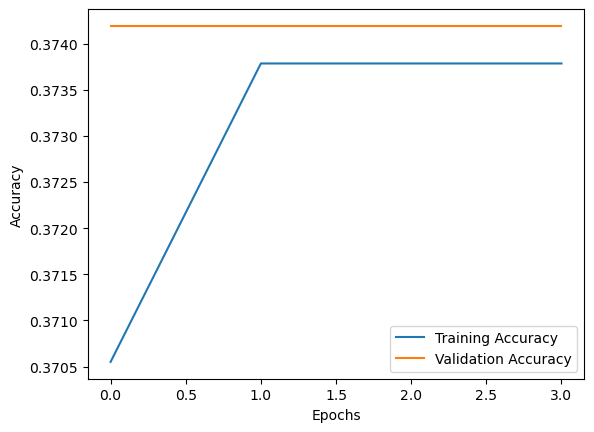

In [57]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Loss: {val_loss}, Accuracy: {val_acc}')
import matplotlib.pyplot as plt

# Wykresy strata (loss) i dokładność (accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

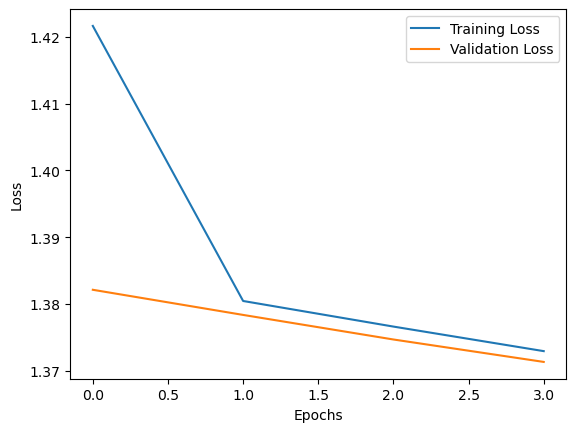

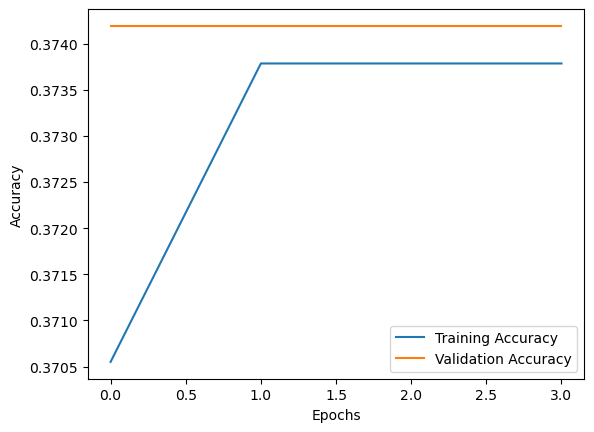

In [58]:
# Wykresy strata (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Wykresy dokładność (accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 64ms/step


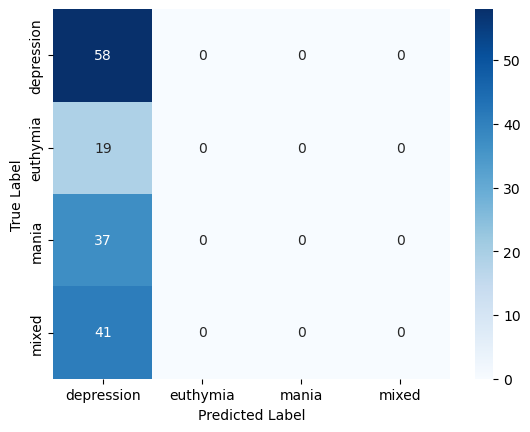

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predykcje na zbiorze walidacyjnym
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Wybieramy klasę z najwyższym prawdopodobieństwem

# Tworzenie macierzy pomyłek
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Wizualizacja macierzy pomyłek
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Tworzenie raportu dla każdej klasy
report = classification_report(y_val, y_pred_classes, target_names=label_encoder.classes_)
print(report)